# Air Passengers
 We are analyzing dataset which contains monthly totals of international Airline passengers between 1949 to 1960.
 Our objective is -
 * Performing EDA
 * Decomposition of Data
 * Testing the stationarity  
 * Fitting An Arima Model
 * Predicting Forecasts

In [32]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = 15,6

In [33]:
data = pd.read_csv("AirPassengers.csv")

In [34]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [35]:
from datetime import datetime as dt

data['Month'] = data['Month'].apply(lambda x : dt(int(x[:4]),int(x[5:]),15))
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


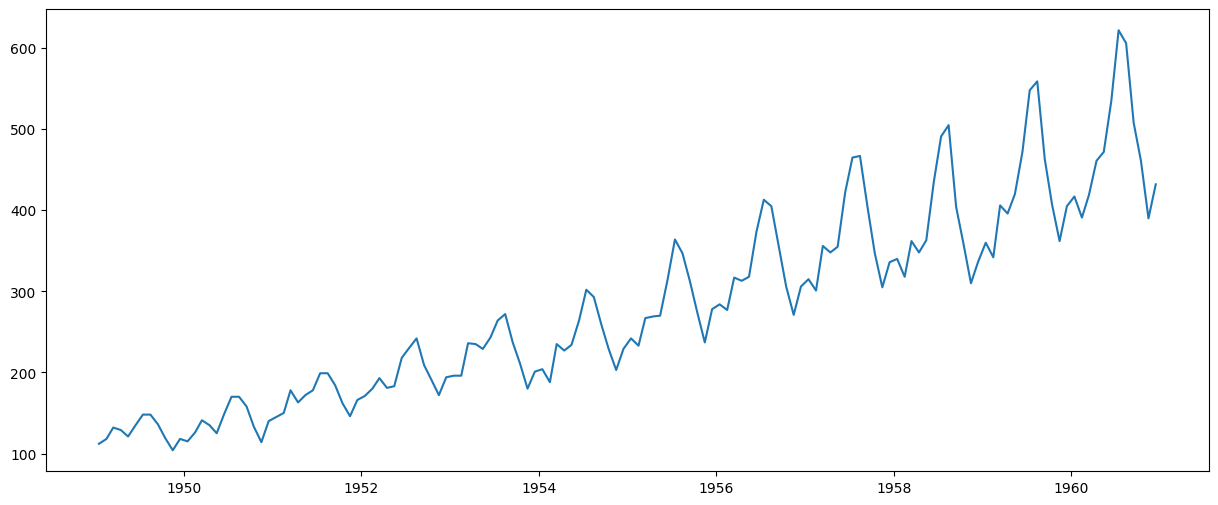

In [36]:
ts = data['#Passengers']
plt.plot(ts)

In [37]:
ts_log = np.log(ts)

Testing If Data is Stationary

In [38]:
def test_stationarity(timeseries):
  rollmean = timeseries.rolling(window = 52, center = False).mean()
  rollstd = timeseries.rolling(window = 52, center = False).std()

  orig = plt.plot(timeseries, color = 'blue', label = 'Original')
  mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
  std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block = False)

  print('Results For Dicky Fuller Test :')
  dftest = adfuller(timeseries, autolag = 'AIC')
  dfoutput = pd.Series(dftest[:4], index = ['Test Statistic', 'p-value', '# Lags used', 'No Of Observations Used'])

  for key,value in dftest[4].items():
    dfoutput['Critical Values (%s)' %key] = value
  print(dfoutput)


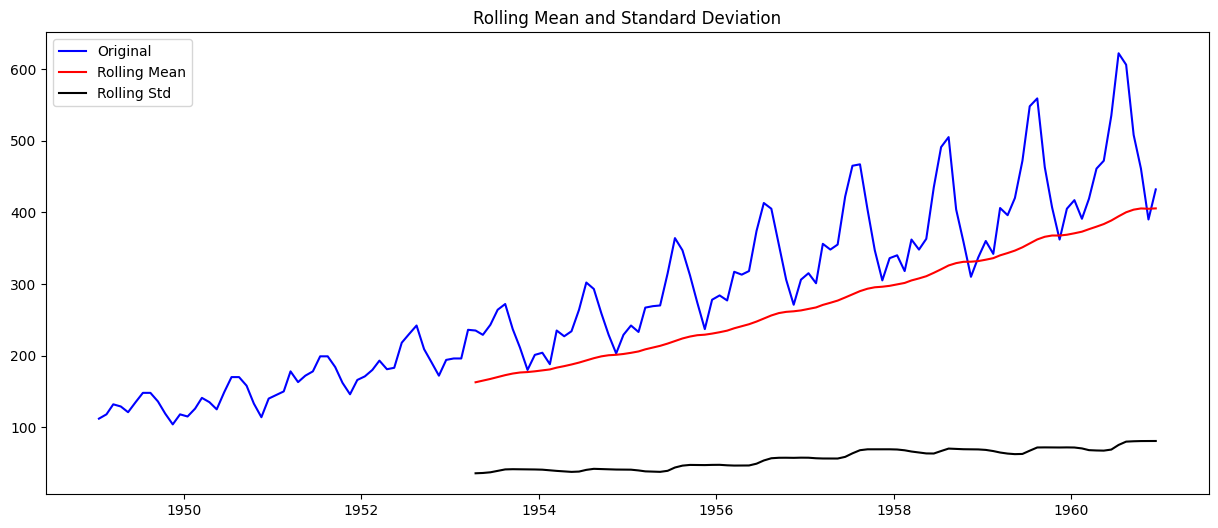

Results For Dicky Fuller Test :
Test Statistic               0.815369
p-value                      0.991880
# Lags used                 13.000000
No Of Observations Used    130.000000
Critical Values (1%)        -3.481682
Critical Values (5%)        -2.884042
Critical Values (10%)       -2.578770
dtype: float64


In [39]:
test_stationarity(data['#Passengers'])

Null Hypothesis of Dicky Fuller Test cannot be rejected. Dataset is not stationary

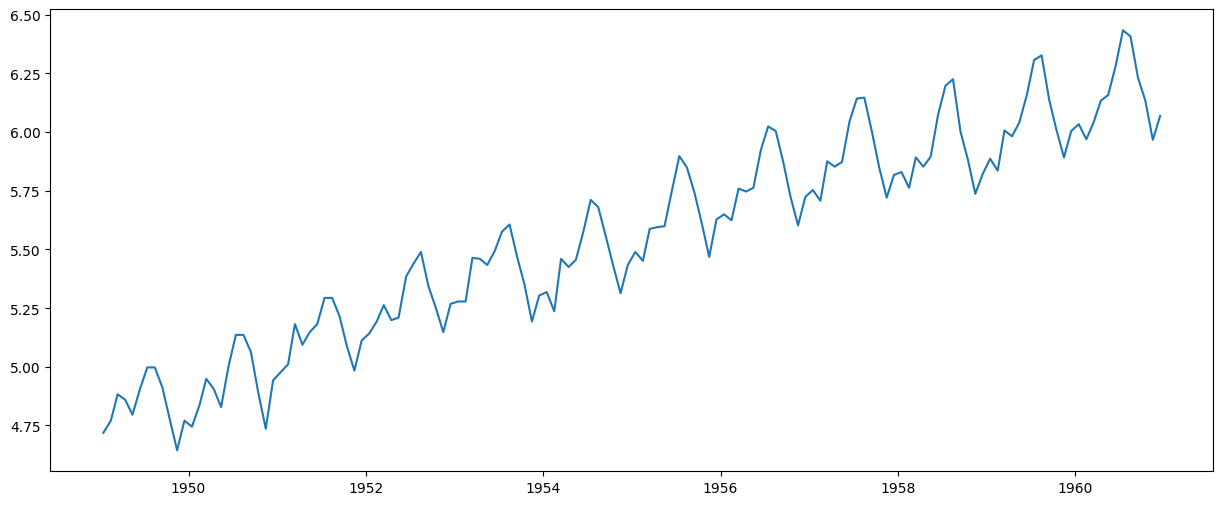

In [40]:
plt.plot(ts_log)

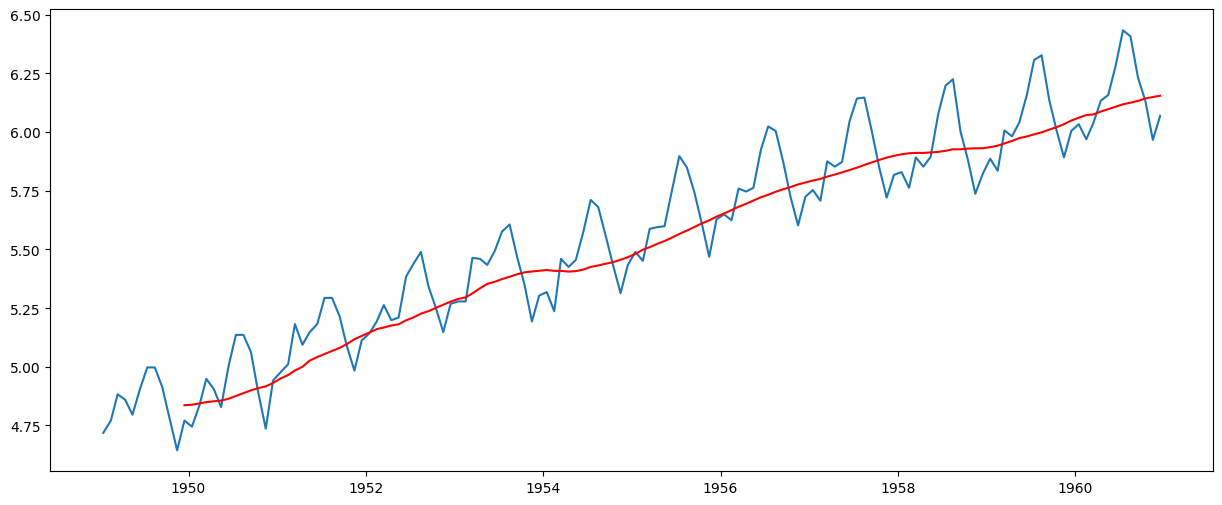

In [41]:
movingavg = ts_log.rolling(window = 12).mean()
movingstd = ts_log.rolling(window = 12).std()
plt.plot(ts_log)
plt.plot(movingavg, color = 'red')

In [42]:
ts_log_mv_diff = ts_log - movingavg
ts_log_mv_diff.head(12)

Month
1949-01-15         NaN
1949-02-15         NaN
1949-03-15         NaN
1949-04-15         NaN
1949-05-15         NaN
1949-06-15         NaN
1949-07-15         NaN
1949-08-15         NaN
1949-09-15         NaN
1949-10-15         NaN
1949-11-15         NaN
1949-12-15   -0.065494
Name: #Passengers, dtype: float64

In [43]:
ts_log_mv_diff = ts_log_mv_diff.dropna()
ts_log_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

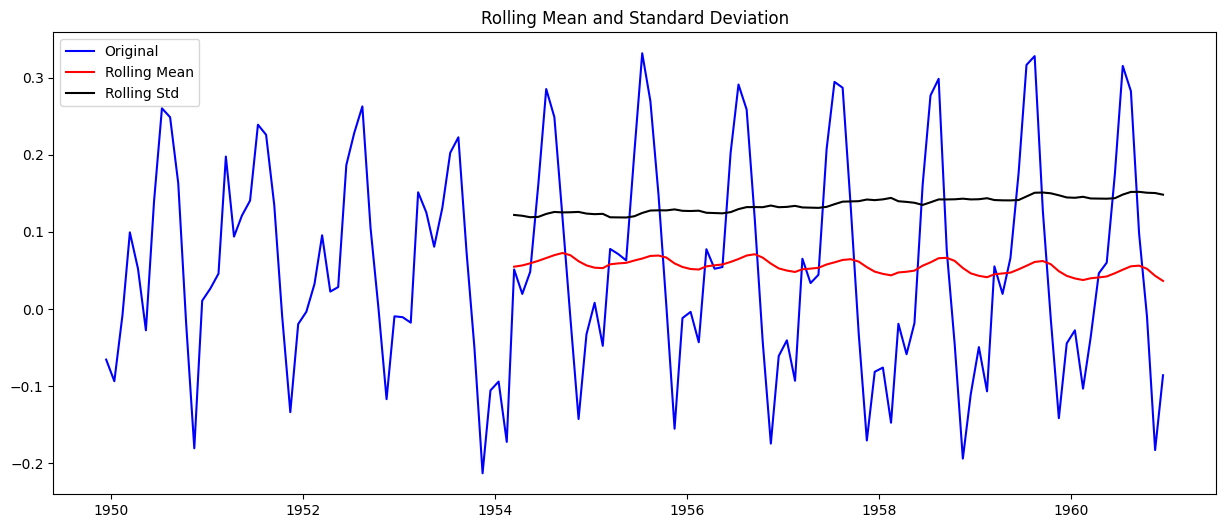

Results For Dicky Fuller Test :
Test Statistic              -3.162908
p-value                      0.022235
# Lags used                 13.000000
No Of Observations Used    119.000000
Critical Values (1%)        -3.486535
Critical Values (5%)        -2.886151
Critical Values (10%)       -2.579896
dtype: float64


In [44]:
test_stationarity(ts_log_mv_diff)

Test Statistic is below the critical value for 1%. We can comfortably reject stationarity in this dataset.
We are 99% confident that data is not stationary

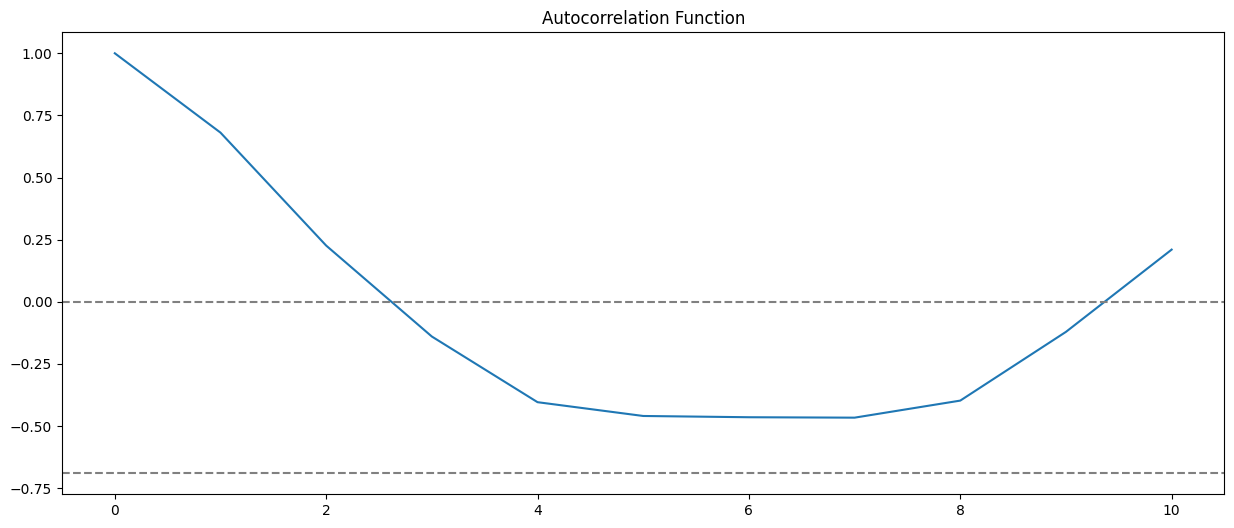

In [45]:
# Plotting ACF

plt.plot(np.arange(0,11), acf(ts_log_mv_diff, nlags = 10))
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -7.96/np.sqrt(len(ts_log_mv_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')
plt.show()

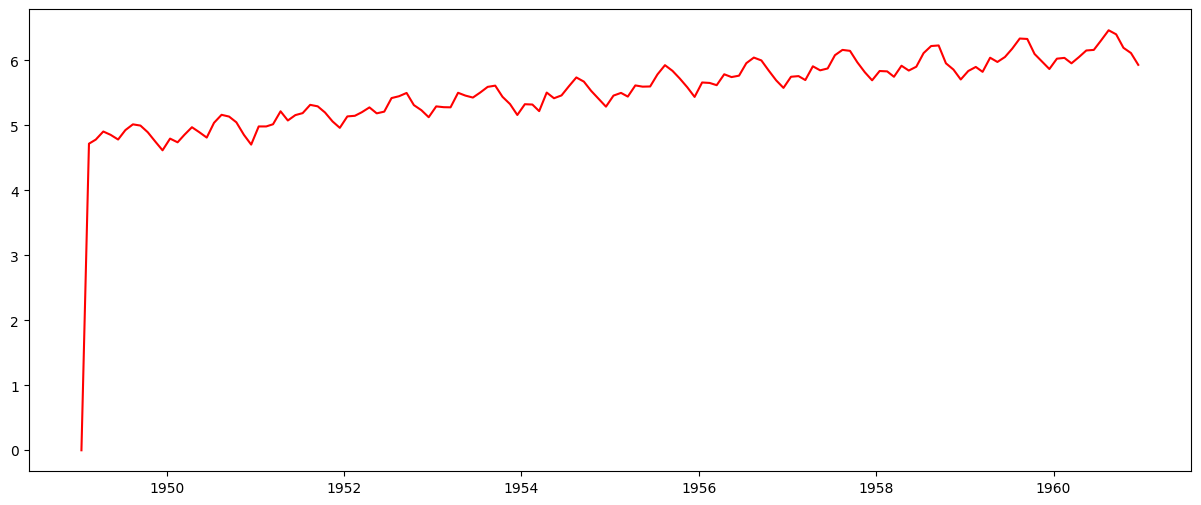

In [58]:
import warnings
warnings.filterwarnings("ignore")
model = ARIMA(ts_log, order = (1,1,0))
results_ARIMA = model.fit()
plt.plot(results_ARIMA.fittedvalues,color='red')

In [59]:
predictions_ARIMA_log = pd.Series(results_ARIMA.fittedvalues,copy = True)
predictions_ARIMA_log.head()

Month
1949-01-15    0.000000
1949-02-15    4.718499
1949-03-15    4.781405
1949-04-15    4.905833
1949-05-15    4.855090
dtype: float64

In [60]:
predictions_ARIMA_log["1949-01-15"] = 4.7

Text(0.5, 1.0, 'Predicted vs Actual Values')

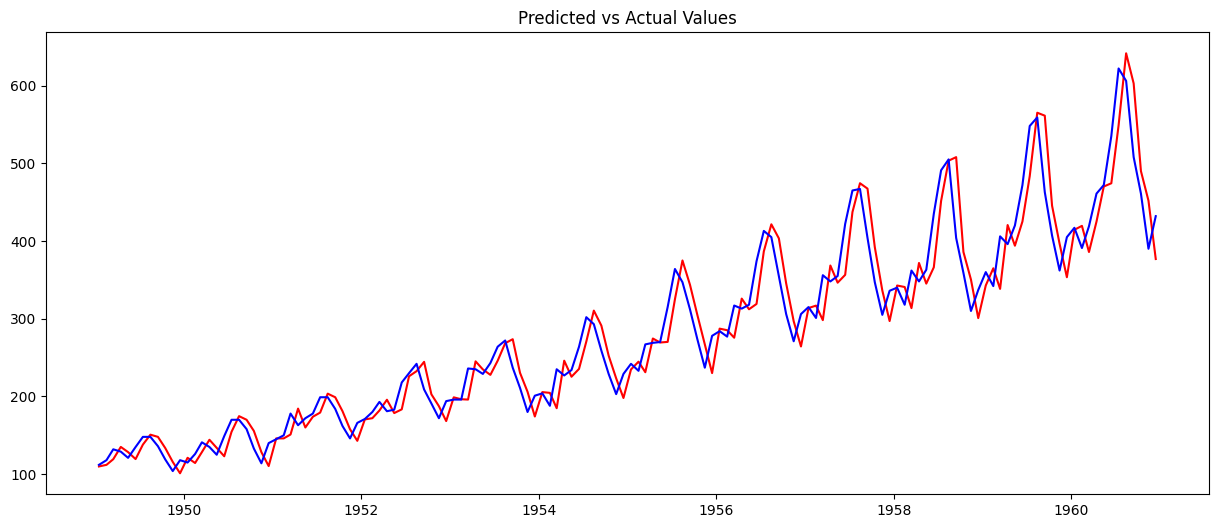

In [64]:
predictions = np.exp(predictions_ARIMA_log)
plt.plot(predictions, color='red')
plt.plot(ts, color ='blue')
plt.title('Predicted vs Actual Values')

In [67]:
print("RMSE")
print(np.sqrt(sum((ts-predictions)**2)/len(ts)))

RMSE
32.183901549387585
